In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import xgboost as xgb
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.tsa.api as tsa
import statsmodels.graphics.tsaplots as tsaplots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.sm_exceptions import ValueWarning
import statsmodels.stats.diagnostic as diagnostic
import statsmodels.tools.eval_measures as eval_measures
import statsmodels.tsa.vector_ar.var_model as var_model
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import json
import warnings
from libtad import HolidaysService
from libtad.datatypes.holidays import HolidayType
from joblib import load
from joblib import dump
import os

In [2]:
df = pd.read_csv("nordext_df_climate.csv")

In [3]:
df

,Load Date,Total Load [MW] - Norway,Total Load [MW] - Sweden,Total Load [MW] - Finland,Temp - Norway,Temp - Sweden,Temp - Finland,Day of Week,Month,Year,...,Climate_Change_Nor,Climate_Change_Swe,Climate_Change_Fin,Season,Climate Change - Norway,Climate Change - Sweden,Climate Change - Finland,Climate_Change_Norway,Climate_Change_Sweden,Climate_Change_Finland
0,1/1/2010,19067,19703,11427,-11.30,-7.62,-15.11,Friday,1,2010,...,0,0,0,Winter,False,False,False,1,1,0
1,1/2/2010,19566,20316,12129,-15.99,-9.00,-19.03,Saturday,1,2010,...,0,0,0,Winter,False,False,False,0,0,0
2,1/3/2010,19531,20844,11925,-14.84,-12.53,-15.06,Sunday,1,2010,...,0,0,0,Winter,False,False,False,0,0,0
3,1/4/2010,20426,21913,12250,-12.64,-12.80,-7.33,Monday,1,2010,...,0,0,0,Winter,False,False,False,0,0,1
4,1/5/2010,21402,23337,12726,-19.60,-16.35,-13.74,Tuesday,1,2010,...,0,0,0,Winter,False,False,False,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5108,12/27/2023,20125,18863,10688,-8.08,-8.57,-7.20,Wednesday,12,2023,...,0,0,0,Winter,False,False,False,1,0,1
5109,12/28/2023,20151,18044,10976,-8.64,-3.80,-4.25,Thursday,12,2023,...,0,0,1,Winter,False,False,False,1,1,1
5110,12/29/2023,19551,17388,11279,-8.05,-0.20,-2.93,Friday,12,2023,...,0,1,1,Winter,False,False,False,1,1,1
5111,12/30/2023,19033,17182,11327,-7.72,-1.63,-7.31,Saturday,12,2023,...,0,1,0,Winter,False,False,False,1,1,1


In [4]:
# Specifying the path to my folder
my_plots =r'E:\ACADEMICS\THESIS\Thesis_all_plots\log_fin'

In [5]:
df.columns

Index(['Load Date', 'Total Load [MW] - Norway', 'Total Load [MW] - Sweden',
       'Total Load [MW] - Finland', 'Temp - Norway', 'Temp - Sweden',
       'Temp - Finland', 'Day of Week', 'Month', 'Year', 'Holiday_Norway',
       'Holiday_Sweden', 'Holiday_Finland', 'HDD_Norway', 'HDD_Sweden',
       'HDD_Finland', 'CDD_Norway', 'CDD_Sweden', 'CDD_Finland',
       'Norway_Temp_Extremes', 'Sweden_Temp_Extremes', 'Finland_Temp_Extremes',
       'Climate_Change_Nor', 'Climate_Change_Swe', 'Climate_Change_Fin',
       'Season', 'Climate Change - Norway', 'Climate Change - Sweden',
       'Climate Change - Finland', 'Climate_Change_Norway',
       'Climate_Change_Sweden', 'Climate_Change_Finland'],
      dtype='object')

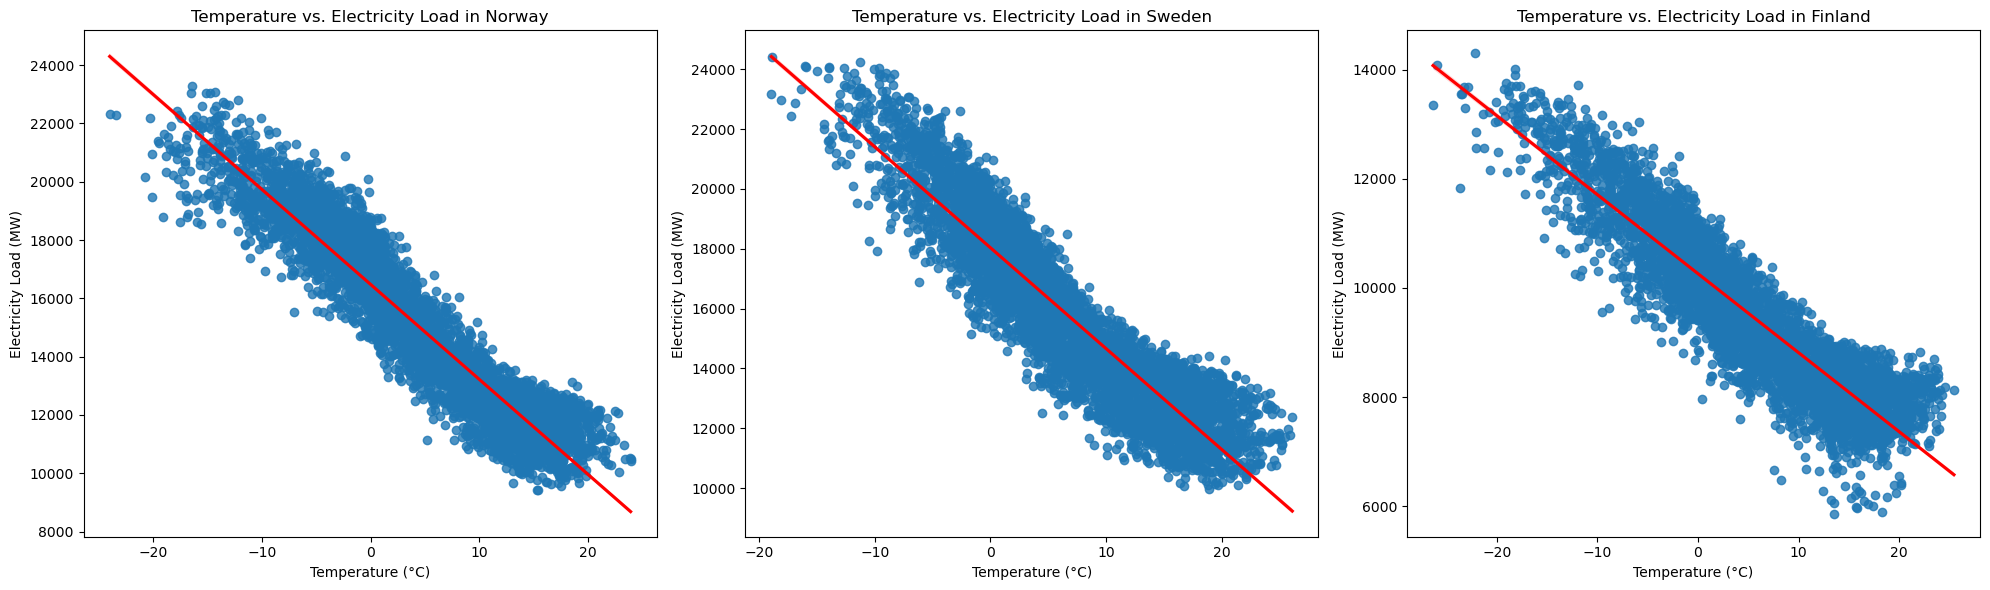

In [6]:
plt.figure(figsize=[20, 6])

# Temperature vs Electricity Load in Norway
plt.subplot(1, 3, 1)
sns.regplot(x='Temp - Norway', y='Total Load [MW] - Norway', data=df, line_kws={"color": "red"})
plt.title('Temperature vs. Electricity Load in Norway')
plt.xlabel('Temperature (°C)')
plt.ylabel('Electricity Load (MW)')

# Temperature vs Electricity Load in Sweden
plt.subplot(1, 3, 2)
sns.regplot(x='Temp - Sweden', y='Total Load [MW] - Sweden', data=df, line_kws={"color": "red"})
plt.title('Temperature vs. Electricity Load in Sweden')
plt.xlabel('Temperature (°C)')
plt.ylabel('Electricity Load (MW)')

# Temperature vs Electricity Load in Finland
plt.subplot(1, 3, 3)
sns.regplot(x='Temp - Finland', y='Total Load [MW] - Finland', data=df, line_kws={"color": "red"})
plt.title('Temperature vs. Electricity Load in Finland')
plt.xlabel('Temperature (°C)')
plt.ylabel('Electricity Load (MW)')
plt.tight_layout()

# Save the plot to the folder
plt.savefig(os.path.join(my_plots, 'plot1.png'), dpi = 600)  # Save as PNG format

plt.show()

In [7]:
# List of countries
countries = ['Norway', 'Sweden', 'Finland']

# Apply logarithmic transformation to the load and temperature for each country
for country in countries:
    # Add a constant to ensure all temperatures are positive before taking log
    df[f'Log Total Load - {country}'] = np.log(df[f'Total Load [MW] - {country}'])
    df[f'Log Temp - {country}'] = np.log(df[f'Temp - {country}'] + 30)  # Adding 30 to ensure all temperatures are positive

# Display the first few rows to verify the new columns
for country in countries:
    print(df[[f'Log Total Load - {country}', f'Log Temp - {country}']].head())

   Log Total Load - Norway  Log Temp - Norway
0                 9.855714           2.928524
1                 9.881549           2.639771
2                 9.879758           2.718660
3                 9.924564           2.854169
4                 9.971240           2.341806
   Log Total Load - Sweden  Log Temp - Sweden
0                 9.888526           3.108168
1                 9.919164           3.044522
2                 9.944821           2.860485
3                 9.994835           2.844909
4                10.057795           2.613740
   Log Total Load - Finland  Log Temp - Finland
0                  9.343734            2.700690
1                  9.403355            2.395164
2                  9.386392            2.704042
3                  9.413281            3.121042
4                  9.451402            2.788708


In [8]:
# Converting 'Load Date' into datetime format and setting it as the index
df['Load Date'] = pd.to_datetime(df['Load Date'])
df.set_index('Load Date', inplace=True)

# Splitting the data into training and testing sets
training_data = df.loc['2010-01-01':'2020-12-31'] #first eleven years
testing_data = df.loc['2021-01-01':'2023-12-31']  #Last three years

# Displaying the shapes of the training and testing sets as a quick verification
training_data.shape, testing_data.shape

((4018, 37), (1095, 37))

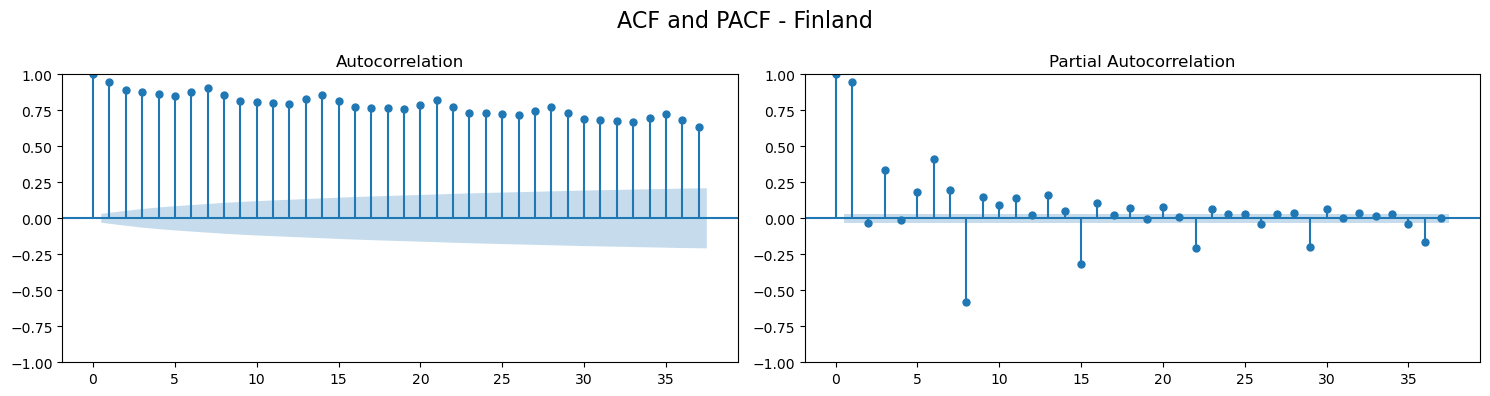

In [9]:
# Selecting Norway's Total Load for demonstration
ts_finland_load = training_data['Log Total Load - Finland']

# Performing a stationarity test
adf_test_result = adfuller(ts_finland_load)

# Preparing to plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
plt.suptitle('ACF and PACF - Finland', fontsize=16)  # Add heading

# Plotting Autocorrelation Function (ACF)
plot_acf(ts_finland_load, ax=axes[0])

# Plotting Partial Autocorrelation Function (PACF)
plot_pacf(ts_finland_load, ax=axes[1], method='ywm')

plt.tight_layout()
plt.savefig(os.path.join(my_plots, 'plot2.png'), dpi = 600)  # Save as PNG format

plt.show()

#adf_test_result

In [10]:
# Function to perform the Augmented Dickey-Fuller test
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')  # Dropping na to make sure the test works on non-NaN values
    labels = ['ADF test statistic', 'p-value', '# lags used', '# observations']
    out = pd.Series(result[0:4], index=labels)

    for key, value in result[4].items():
        out[f'critical value ({key})'] = value
    print(out.to_string())  # .to_string() to print all lines

# Testing for stationarity on the 'Total Load [MW] - Finland' column
print("Total Load [MW] - Finland:")
adf_test(df['Total Load [MW] - Norway'], 'Total Load [MW] - Finland')

# Testing for stationarity on the 'Temp - Norway' column
print("\nTemp - Finland:")
adf_test(df['Temp - Finland'], 'Temp - Finland')


Total Load [MW] - Finland:
Augmented Dickey-Fuller Test: Total Load [MW] - Finland
ADF test statistic        -4.928490
p-value                    0.000031
# lags used               29.000000
# observations          5083.000000
critical value (1%)       -3.431637
critical value (5%)       -2.862109
critical value (10%)      -2.567073

Temp - Finland:
Augmented Dickey-Fuller Test: Temp - Finland
ADF test statistic        -4.632629
p-value                    0.000112
# lags used               33.000000
# observations          5079.000000
critical value (1%)       -3.431638
critical value (5%)       -2.862109
critical value (10%)      -2.567073


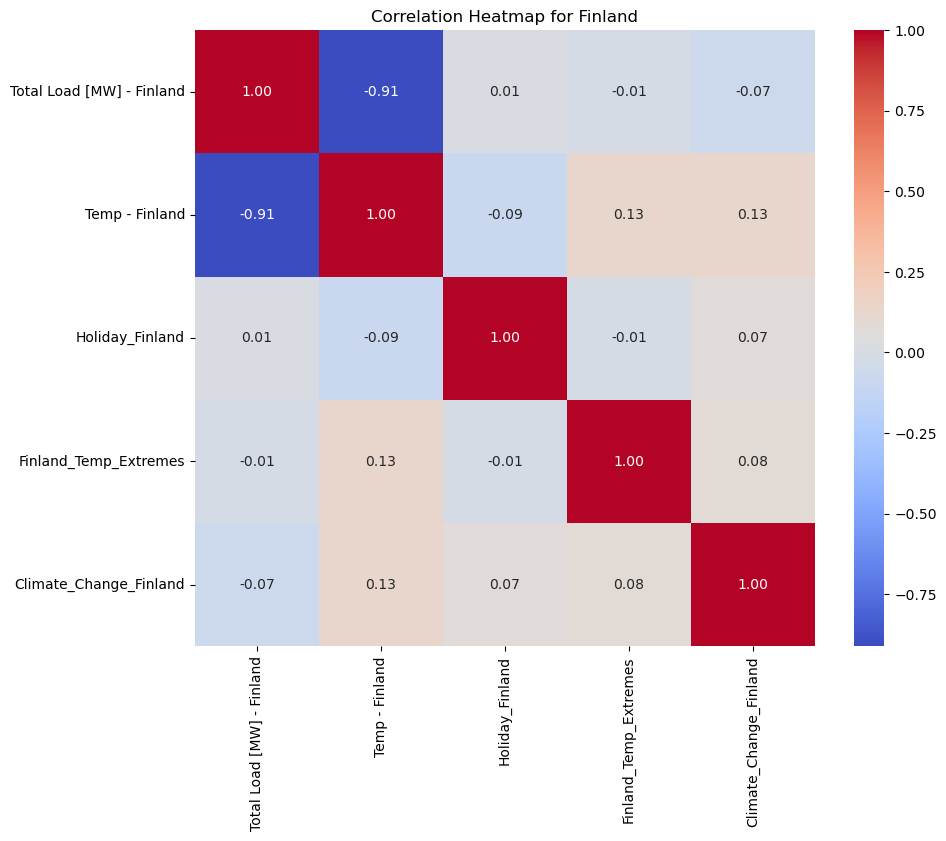

In [11]:
# Selecting columns relevant to finland for correlation analysis
finland_columns = ['Total Load [MW] - Finland', 'Temp - Finland', 'Holiday_Finland','Finland_Temp_Extremes','Climate_Change_Finland']
finland_df = df[finland_columns]

# Calculating correlation matrix
correlation_matrix_finland = finland_df.corr()

# Plotting the heatmap for Finland
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_finland, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Finland')
plt.savefig(os.path.join(my_plots, 'corrrr.png'), dpi=600)  # Saving as PNG format at high resolution

plt.show()

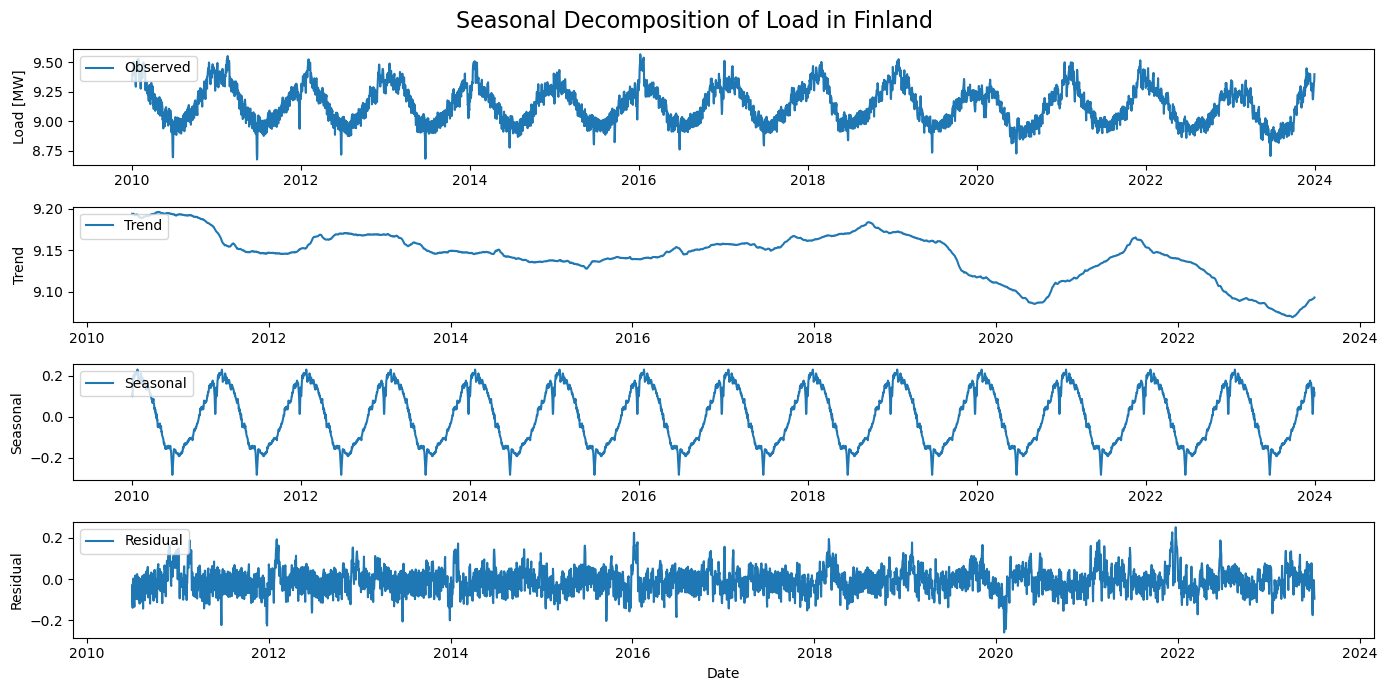

In [12]:
# Seasonal decomposition
decomposed_finland = seasonal_decompose(df['Log Total Load - Finland'], model='additive', period=365)

# Plotting the decomposed components for Sweden load data
plt.figure(figsize=(14, 7))
plt.suptitle('Seasonal Decomposition of Load in Finland', fontsize=16) 
plt.subplot(411)
plt.plot(decomposed_finland.observed, label='Observed')
plt.legend(loc='upper left')
plt.ylabel('Load [MW]')  # Add y-axis label
plt.subplot(412)
plt.plot(decomposed_finland.trend, label='Trend')
plt.legend(loc='upper left')
plt.ylabel('Trend')  # Add y-axis label
plt.subplot(413)
plt.plot(decomposed_finland.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.ylabel('Seasonal')  # Add y-axis label
plt.subplot(414)
plt.plot(decomposed_finland.resid, label='Residual')
plt.legend(loc='upper left')
plt.ylabel('Residual')  # Add y-axis label
plt.xlabel('Date')  # Add x-axis label
plt.tight_layout()
plt.savefig(os.path.join(my_plots, 'decompose.png'), dpi=600)  # Save as PNG format
plt.show()

In [13]:
warnings.simplefilter('ignore', ValueWarning)

In [14]:
# Resampling to monthly data and aggregate appropriately
monthly_data = df.resample('ME').agg({
    'Log Total Load - Finland': 'sum',  # Sum of load for the month
    'Temp - Finland': 'mean',            # Average temperature for the month
    'Holiday_Finland': 'sum',            # Total count of holiday days in the month
    'Finland_Temp_Extremes': 'sum',      # Total count of days with climate variability
    'Climate_Change_Finland': 'sum'      # Total count of days with temperatures above the mean 
})

# Splitting adata into training and testing sets
y_train = monthly_data.loc['2010-01-01':'2019-12-31', 'Log Total Load - Finland']
X_train = monthly_data.loc['2010-01-01':'2019-12-31', ['Temp - Finland','Holiday_Finland']]
y_test = monthly_data.loc['2020-01-01':'2023-12-31', 'Log Total Load - Finland']
X_test = monthly_data.loc['2020-01-01':'2023-12-31', ['Temp - Finland','Holiday_Finland']]

### SARIMAX

In [15]:
# Defining the target and exogenous variables for the SARIMAX model
# Building and fitting the SARIMAX model
sarimax_model = SARIMAX(y_train, exog=X_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_result = sarimax_model.fit()

# Making predictions on the test set
predictions = sarimax_result.predict(start=y_test.index[0], end=y_test.index[-1], exog=X_test)

# Calculating RMSE for the model's predictions
rmse = np.sqrt(mean_squared_error(y_test, predictions))

sarimax_result.summary(), rmse

(<class 'statsmodels.iolib.summary.Summary'>
 """
                                      SARIMAX Results                                      
 Dep. Variable:           Log Total Load - Finland   No. Observations:                  120
 Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -190.077
 Date:                            Mon, 17 Jun 2024   AIC                            394.153
 Time:                                    10:33:44   BIC                            412.863
 Sample:                                01-31-2010   HQIC                           401.738
                                      - 12-31-2019                                         
 Covariance Type:                              opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
 -----------------------------------------------------------------------------------
 Temp - Finland     -0.3250      0.045     -

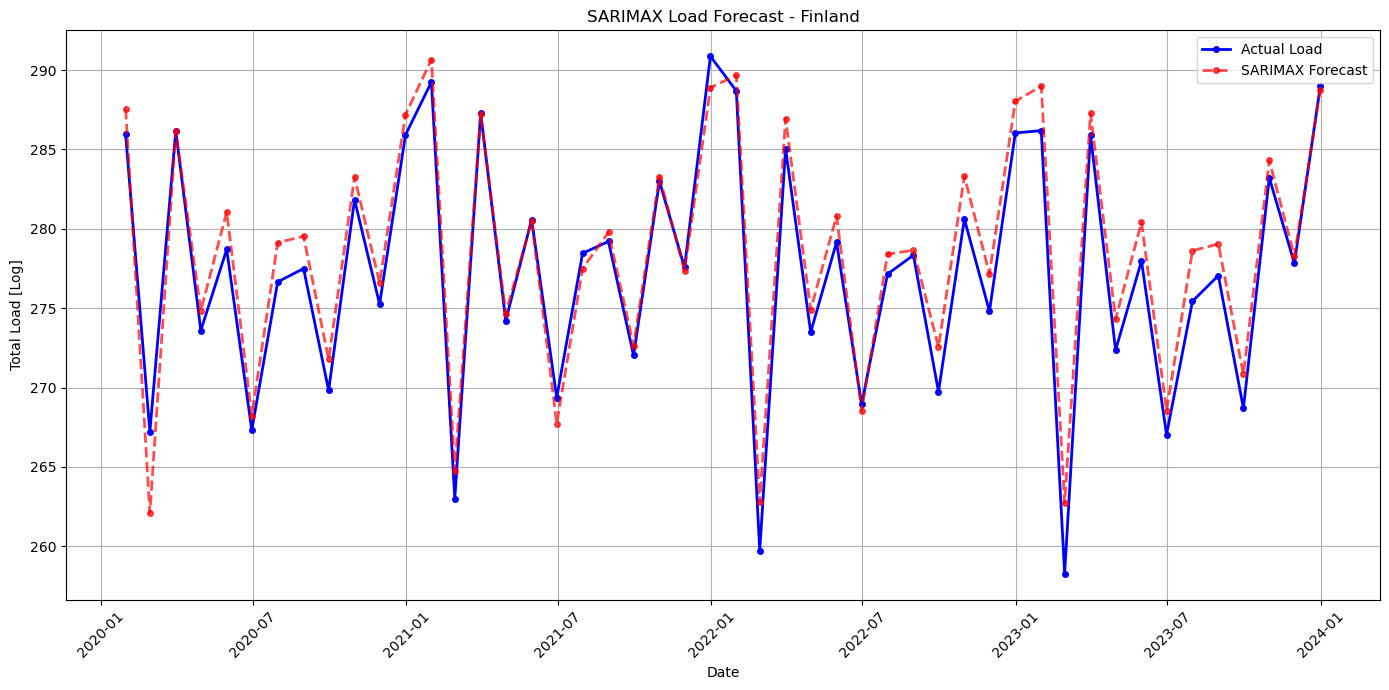

In [16]:
# Plotting the actual vs. predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Load', color='blue', marker='.', linestyle='-', linewidth=2, markersize=8)
plt.plot(predictions.index, predictions, label='SARIMAX Forecast', color='red', alpha=0.7, marker='.', linestyle='--', linewidth=2, markersize=8)

plt.title('SARIMAX Load Forecast - Finland')
plt.xlabel('Date')
plt.ylabel('Total Load [Log]')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid to the winter predictions plot
plt.tight_layout()
plt.savefig(os.path.join(my_plots, 'plot5_sarimax.png'), dpi = 600)  # Save as PNG format
plt.show()

In [17]:
#mae, mape, mse
# Calculating MSE
mse_sarimax = mean_squared_error(y_test, predictions)

# Calculating MAE
mae_sarimax = mean_absolute_error(y_test, predictions)

# Calculating RMSE
rmse_sarimax = np.sqrt(mse_sarimax)

# Calculating MAPE
mape_sarimax = np.mean(np.abs((y_test - predictions) / y_test)) * 100

print(f"MSE (SARIMAX): {mse_sarimax}")
print(f"MAE (SARIMAX): {mae_sarimax}")
print(f"RMSE (SARIMAX): {rmse_sarimax}")
print(f"MAPE (SARIMAX): {mape_sarimax}%")

MSE (SARIMAX): 3.6810377950911213
MAE (SARIMAX): 1.5872360824104916
RMSE (SARIMAX): 1.918603084301472
MAPE (SARIMAX): 0.5774745637043961%


#### EXPANDING THE EXOGENOUS VARIABLES TO EXTREME WEATHER CONDITIONS

In [18]:
#Lets create an interaction term
monthly_data['Clim_ext'] = monthly_data['Finland_Temp_Extremes'] * monthly_data['Climate_Change_Finland']

In [19]:
# Adjusting the selection of exogenous variables
X_train_exog = monthly_data.loc['2010-01-01':'2019-12-31', ['Temp - Finland', 'Holiday_Finland', 'Finland_Temp_Extremes','Climate_Change_Finland','Clim_ext'  ]]
X_test_exog = monthly_data.loc['2020-01-01':'2023-12-31', ['Temp - Finland', 'Holiday_Finland', 'Finland_Temp_Extremes','Climate_Change_Finland','Clim_ext' ]]

In [20]:
# Defining the target and exogenous variables for my SARIMAX model
# Building and fitting the SARIMAX model
sarimax_model2 = SARIMAX(y_train, exog=X_train_exog, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_result2 = sarimax_model2.fit()

# Making predictions on the test set
predictions2 = sarimax_result2.predict(start=y_test.index[0], end=y_test.index[-1], exog=X_test_exog)

# Calculating RMSE for the model's predictions
rmse = np.sqrt(mean_squared_error(y_test, predictions2))

sarimax_result2.summary(), rmse

C:\Users\sammy\anaconda3\envs\thesis\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(<class 'statsmodels.iolib.summary.Summary'>
 """
                                      SARIMAX Results                                      
 Dep. Variable:           Log Total Load - Finland   No. Observations:                  120
 Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -191.595
 Date:                            Mon, 17 Jun 2024   AIC                            403.190
 Time:                                    10:33:48   BIC                            429.919
 Sample:                                01-31-2010   HQIC                           414.026
                                      - 12-31-2019                                         
 Covariance Type:                              opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------------------
 Temp - Finland            -0.

In [21]:
# Calculating MSE
mse_sarimax2 = mean_squared_error(y_test, predictions2)

# Calculating MAE
mae_sarimax2 = mean_absolute_error(y_test, predictions2)

# Calculating RMSE
rmse_sarimax2 = np.sqrt(mse_sarimax2)

# Calculating MAPE
mape_sarimax2 = np.mean(np.abs((y_test - predictions2) / y_test)) * 100

print(f"MSE (SARIMAX2): {mse_sarimax2}")
print(f"MAE (SARIMAX2): {mae_sarimax2}")
print(f"RMSE (SARIMAX2): {rmse_sarimax2}")
print(f"MAPE (SARIMAX2): {mape_sarimax2}%")

MSE (SARIMAX2): 3.319550526556571
MAE (SARIMAX2): 1.46818154289731
RMSE (SARIMAX2): 1.8219633713542571
MAPE (SARIMAX2): 0.5342951976173349%


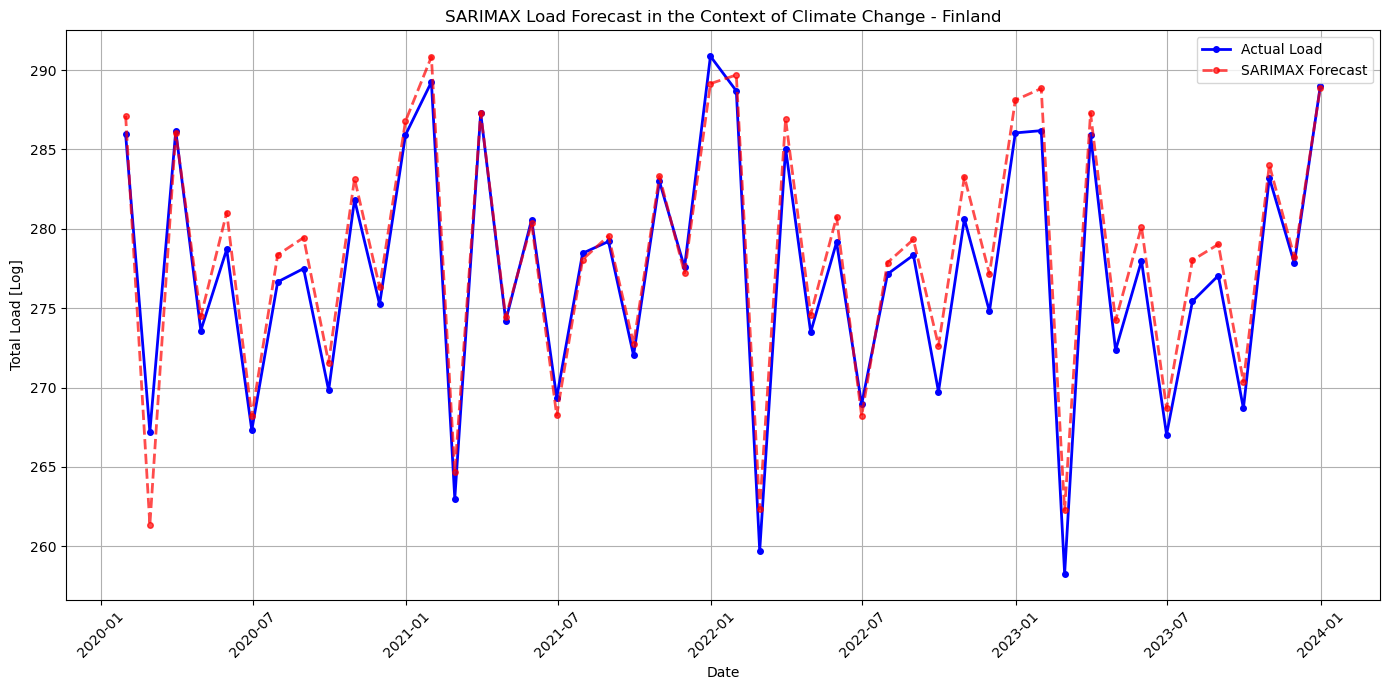

In [22]:
# Plotting the actual vs. predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Load', color='blue', marker='.', linestyle='-', linewidth=2, markersize=8)
plt.plot(predictions2.index, predictions2, label='SARIMAX Forecast', color='red', alpha=0.7, marker='.', linestyle='--', linewidth=2, markersize=8)

plt.title('SARIMAX Load Forecast in the Context of Climate Change - Finland')
plt.xlabel('Date')
plt.ylabel('Total Load [Log]')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid to the winter predictions plot
plt.tight_layout()
# Save the plot to the folder
plt.savefig(os.path.join(my_plots, 'plot5_sarimax2.png'), dpi = 600)  # Save as PNG format

plt.show()

# NOW LET US DEPLOY OUR MACHINE LEARNING MODELS

In [23]:
# Feature Engineering: Creating time-based features from the index
monthly_data['Month'] = monthly_data.index.month
monthly_data['Year'] = monthly_data.index.year

# Selecting the features and target variable
features = ['Temp - Finland', 'Month', 'Year']
target = 'Log Total Load - Finland'

# Splitting the dataset into features (X) and target (y) for the machine learning model
X = monthly_data[features]
y = monthly_data[target]

# Splitting the data into training and testing sets for the machine learning model
X_train_ml, X_test_ml = X.loc['2010-01-01':'2019-12-31'], X.loc['2020-01-01':'2023-12-31']
y_train_ml, y_test_ml = y.loc['2010-01-01':'2019-12-31'], y.loc['2020-01-01':'2023-12-31']


# Data Preprocessing: Standardizing the features
scaler = StandardScaler()
X_train_ml_scaled = scaler.fit_transform(X_train_ml)
X_test_ml_scaled = scaler.transform(X_test_ml)

# Model Selection: Choosing Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf_regressor.fit(X_train_ml_scaled, y_train_ml)

# Making predictions
predictions_ml = rf_regressor.predict(X_test_ml_scaled)

# Evaluating the model
mse_ml = mean_squared_error(y_test_ml, predictions_ml)
rmse_ml = np.sqrt(mse_ml)
mae_ml = mean_absolute_error(y_test_ml, predictions_ml)
mape_ml = np.mean(np.abs((y_test_ml - predictions_ml) / y_test_ml)) * 100

mse_ml, rmse_ml, mae_ml, mape_ml


(6.070970831105039, 2.4639340151686366, 1.9750348146364125, 0.719778297064731)

In [24]:
# Making predictions on my training set
train_predictions_ml = rf_regressor.predict(X_train_ml_scaled)

# Evaluating my model on the training set
mse_in_sample_ml = mean_squared_error(y_train_ml, train_predictions_ml)
rmse_in_sample_ml = np.sqrt(mse_in_sample_ml)
mae_in_sample_ml = mean_absolute_error(y_train_ml, train_predictions_ml)
mape_in_sample_ml = np.mean(np.abs((y_train_ml - train_predictions_ml) / y_train_ml)) * 100

# Printing the in-sample evaluation metrics
print("In-sample Evaluation Metrics for Random Forest Regressor:")
print(f"MSE (In-sample): {mse_in_sample_ml}")
print(f"RMSE (In-sample): {rmse_in_sample_ml}")
print(f"MAE (In-sample): {mae_in_sample_ml}")
print(f"MAPE (In-sample): {mape_in_sample_ml}%")

In-sample Evaluation Metrics for Random Forest Regressor:
MSE (In-sample): 0.6835822516717717
RMSE (In-sample): 0.826790331143133
MAE (In-sample): 0.5006377506608317
MAPE (In-sample): 0.1815633710985056%


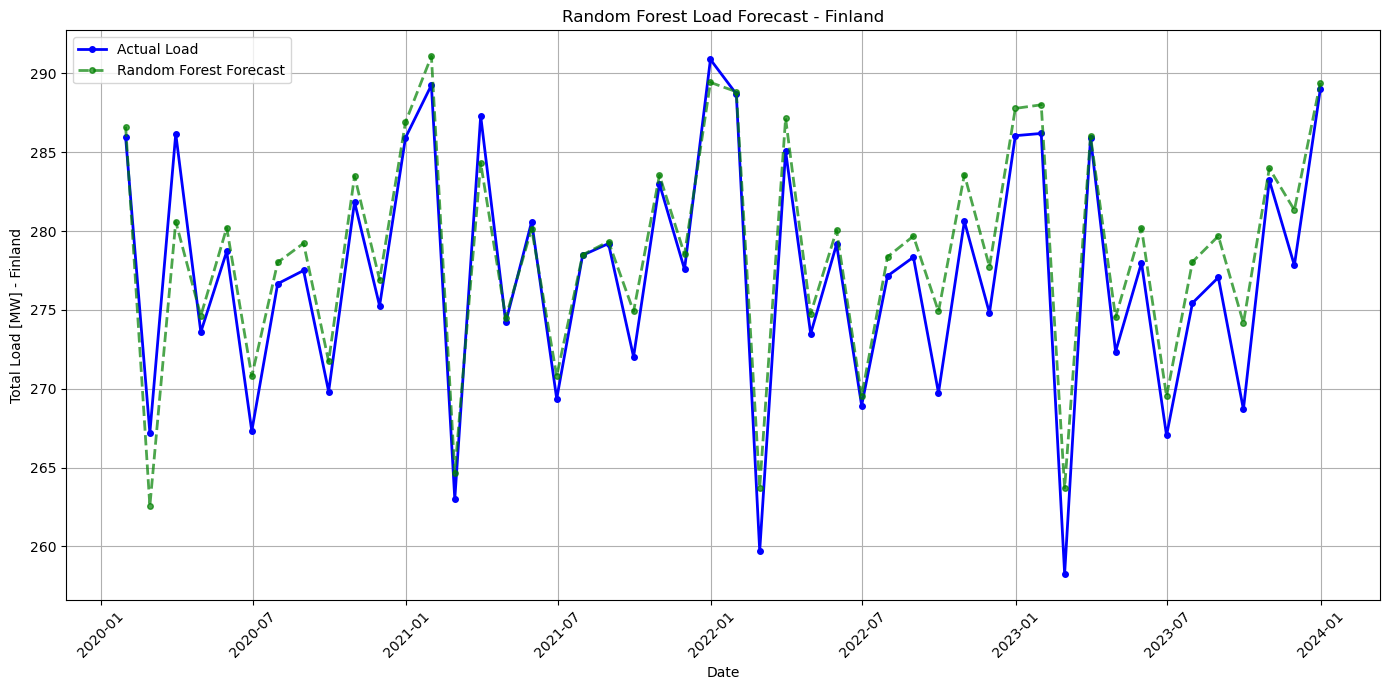

In [25]:
# Plotting the actual vs. predicted values from the Random Forest model
plt.figure(figsize=(14, 7))
plt.plot(y_test_ml.index, y_test_ml, label='Actual Load', color='blue', marker='.', linestyle='-', linewidth=2, markersize=8)
plt.plot(y_test_ml.index, predictions_ml, label='Random Forest Forecast', color='green', alpha=0.7, marker='.', linestyle='--', linewidth=2, markersize=8)

plt.title('Random Forest Load Forecast - Finland')
plt.xlabel('Date')
plt.ylabel('Total Load [MW] - Finland')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid to the winter predictions plot
plt.tight_layout()
plt.savefig(os.path.join(my_plots, 'plot6.png'), dpi = 600)  # Save as PNG format
plt.show()

### GB

In [26]:
# Model Selection: Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Training the model
gb_regressor.fit(X_train_ml_scaled, y_train_ml)

# Making predictions
predictions_gb = gb_regressor.predict(X_test_ml_scaled)

# Evaluating the model
mse_gb = mean_squared_error(y_test_ml, predictions_gb)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test_ml, predictions_gb)
mape_gb = np.mean(np.abs((y_test_ml - predictions_gb) / y_test_ml)) * 100

mse_gb, rmse_gb, mae_gb, mape_gb


(7.4714225479421605,
 2.7333903028916597,
 1.9438597460393794,
 0.7096738053539657)

In [27]:
# Making predictions on the training set for the Gradient Boosting model
train_predictions_gb = gb_regressor.predict(X_train_ml_scaled)

# Evaluating the model on the training set
mse_in_sample_gb = mean_squared_error(y_train_ml, train_predictions_gb)
rmse_in_sample_gb = np.sqrt(mse_in_sample_gb)
mae_in_sample_gb = mean_absolute_error(y_train_ml, train_predictions_gb)
mape_in_sample_gb = np.mean(np.abs((y_train_ml - train_predictions_gb) / y_train_ml)) * 100

# Printing the in-sample evaluation metrics for the Gradient Boosting Regressor
print("In-sample Evaluation Metrics for Gradient Boosting Regressor:")
print(f"MSE (In-sample): {mse_in_sample_gb}")
print(f"RMSE (In-sample): {rmse_in_sample_gb}")
print(f"MAE (In-sample): {mae_in_sample_gb}")
print(f"MAPE (In-sample): {mape_in_sample_gb}%")

In-sample Evaluation Metrics for Gradient Boosting Regressor:
MSE (In-sample): 0.30172441900074815
RMSE (In-sample): 0.5492944738487254
MAE (In-sample): 0.41418149382250014
MAPE (In-sample): 0.14970413398543025%


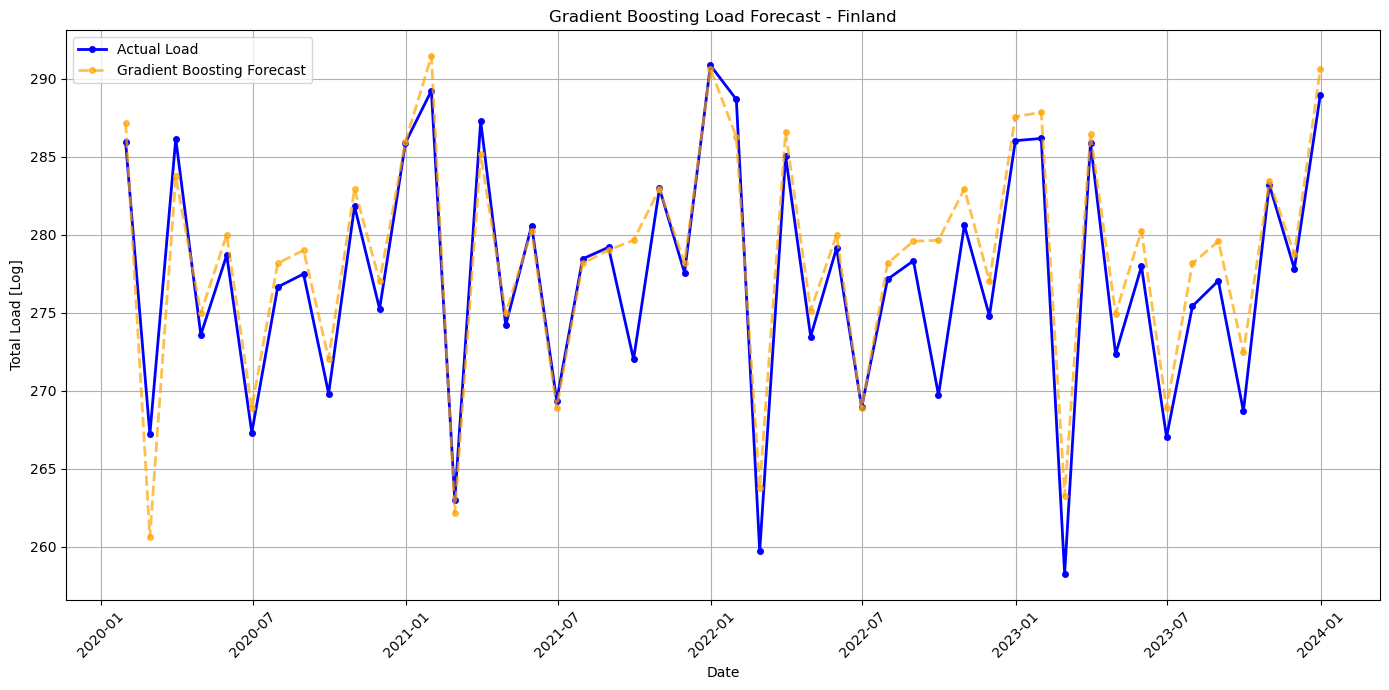

In [28]:
# Plotting the actual vs. predicted values from the Gradient Boosting model
plt.figure(figsize=(14, 7))
plt.plot(y_test_ml.index, y_test_ml, label='Actual Load', color='blue', marker='.', linestyle='-', linewidth=2, markersize=8)
plt.plot(y_test_ml.index, predictions_gb, label='Gradient Boosting Forecast', color='orange', alpha=0.7, marker='.', linestyle='--', linewidth=2, markersize=8)

plt.title('Gradient Boosting Load Forecast - Finland')
plt.xlabel('Date')
plt.ylabel('Total Load [Log]')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid to the winter predictions plot
plt.tight_layout()
plt.savefig(os.path.join(my_plots, 'plot7.png'), dpi = 600) # Save as PNG format
plt.show()


# ADDING HOLIDAY AND EXTREME WEATHER CONDITIONS

In [29]:
monthly_data['Month'] = monthly_data.index.month
monthly_data['Year'] = monthly_data.index.year

# Selecting the features and target variable, now including 'Holiday_finlad'
features_ext = ['Temp - Finland', 'Month', 'Year', 'Holiday_Finland', 'Finland_Temp_Extremes', 'Climate_Change_Finland','Clim_ext' ]  # Added Holiday and extreme temp
target_ext = 'Log Total Load - Finland'

# Splitting the dataset into features (X) and target (y) for the machine learning model
X = monthly_data[features_ext]
y = monthly_data[target_ext]

# Splitting the data into training and testing sets for machine learning model
X_train_ml_2, X_test_ml_2 = X.loc['2010-01-01':'2019-12-31'], X.loc['2020-01-01':'2023-12-31']
y_train_ml_2, y_test_ml_2 = y.loc['2010-01-01':'2019-12-31'], y.loc['2020-01-01':'2023-12-31']

# Data Preprocessing: Standardizing the continuous features
scaler_2 = StandardScaler()
# Selecting only continuous features for scaling
continuous_features = ['Temp - Finland', 'Month', 'Year']
X_train_ml_scaled_2 = X_train_ml_2.copy()
X_test_ml_scaled_2 = X_test_ml_2.copy()

# Applying standardization to continuous features
X_train_ml_scaled_2[continuous_features] = scaler_2.fit_transform(X_train_ml_2[continuous_features])
X_test_ml_scaled_2[continuous_features] = scaler_2.transform(X_test_ml_2[continuous_features])

# Model Selection: Creating a new instance of Random Forest Regressor
rf_regressor_2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the new model
rf_regressor_2.fit(X_train_ml_scaled_2, y_train_ml_2)

# Making predictions with the new model
predictions_ml_2 = rf_regressor_2.predict(X_test_ml_scaled_2)

# Evaluating the new model
mse_ml_2 = mean_squared_error(y_test_ml_2, predictions_ml_2)
rmse_ml_2 = np.sqrt(mse_ml_2)
mae_ml_2 = mean_absolute_error(y_test_ml_2, predictions_ml_2)
mape_ml_2 = np.mean(np.abs((y_test_ml_2 - predictions_ml_2) / y_test_ml_2)) * 100

print("MSE for RF 2:", mse_ml_2)
print("RMSE for RF 2:", rmse_ml_2)
print("MAE for RF 2:", mae_ml_2)
print("MAPE for RF 2:", mape_ml_2)

MSE for RF 2: 3.0863220957529394
RMSE for RF 2: 1.7567931283315459
MAE for RF 2: 1.451567835063032
MAPE for RF 2: 0.5282239838391365


In [30]:
# Making predictions on the training set for the second model
train_predictions_ml_2 = rf_regressor_2.predict(X_train_ml_scaled_2)

# Evaluating the model on the training set
mse_in_sample_ml_2 = mean_squared_error(y_train_ml_2, train_predictions_ml_2)
rmse_in_sample_ml_2 = np.sqrt(mse_in_sample_ml_2)
mae_in_sample_ml_2 = mean_absolute_error(y_train_ml_2, train_predictions_ml_2)
mape_in_sample_ml_2 = np.mean(np.abs((y_train_ml_2 - train_predictions_ml_2) / y_train_ml_2)) * 100

# Printing the in-sample evaluation metrics for the second model
print("In-sample Evaluation Metrics for Random Forest Regressor 2:")
print(f"MSE (In-sample): {mse_in_sample_ml_2}")
print(f"RMSE (In-sample): {rmse_in_sample_ml_2}")
print(f"MAE (In-sample): {mae_in_sample_ml_2}")
print(f"MAPE (In-sample): {mape_in_sample_ml_2}%")

In-sample Evaluation Metrics for Random Forest Regressor 2:
MSE (In-sample): 0.4422555208521637
RMSE (In-sample): 0.6650229476132111
MAE (In-sample): 0.3750911688811864
MAPE (In-sample): 0.13617813456146408%


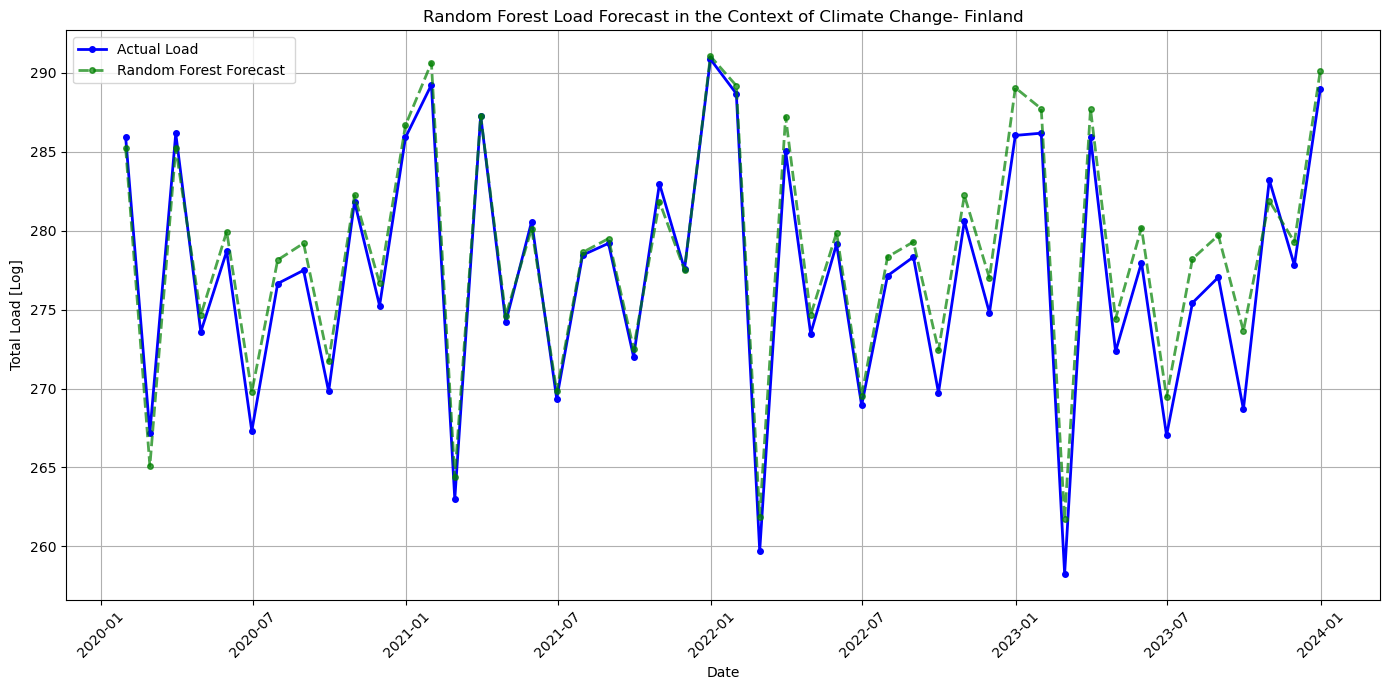

In [31]:
plt.figure(figsize=(14, 7))
plt.plot(y_test_ml_2.index, y_test_ml_2, label='Actual Load', color='blue', marker='.', linestyle='-', linewidth=2, markersize=8)
plt.plot(y_test_ml_2.index, predictions_ml_2, label='Random Forest Forecast ', color='green', alpha=0.7, marker='.', linestyle='--', linewidth=2, markersize=8)

plt.title('Random Forest Load Forecast in the Context of Climate Change- Finland')
plt.xlabel('Date')
plt.ylabel('Total Load [Log]')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)  # Enhancing readability with a grid
plt.tight_layout()
# Save the plot to the specified folder
plt.savefig(os.path.join(my_plots, 'rf_model_2_comparison.png'), dpi=600)  # Saving as PNG format at high resolution to my directory

plt.show()

# GB

In [32]:
# Model Selection: Gradient Boosting Regressor for the second model
gb_regressor_2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Training the second model with the training data including holidays
gb_regressor_2.fit(X_train_ml_scaled_2, y_train_ml_2)

# Making predictions with the second model on the test data
predictions_gb_2 = gb_regressor_2.predict(X_test_ml_scaled_2)

# Evaluating the second model
mse_gb_2 = mean_squared_error(y_test_ml_2, predictions_gb_2)
rmse_gb_2 = np.sqrt(mse_gb_2)
mae_gb_2 = mean_absolute_error(y_test_ml_2, predictions_gb_2)
mape_gb_2 = np.mean(np.abs((y_test_ml_2 - predictions_gb_2) / y_test_ml_2)) * 100

print("MSE for GB Model 2:", mse_gb_2)
print("RMSE for GB Model 2:", rmse_gb_2)
print("MAE for GB Model 2:", mae_gb_2)
print("MAPE for GB Model 2:", mape_gb_2)

MSE for GB Model 2: 3.5958246238556337
RMSE for GB Model 2: 1.8962659686488164
MAE for GB Model 2: 1.5475610918177753
MAPE for GB Model 2: 0.5628054857476132


In [33]:
# Making predictions on the training set for the Gradient Boosting model
train_predictions_gb_2 = gb_regressor_2.predict(X_train_ml_scaled_2)

# Evaluating the model on the training set
mse_in_sample_gb_2 = mean_squared_error(y_train_ml_2, train_predictions_gb_2)
rmse_in_sample_gb_2 = np.sqrt(mse_in_sample_gb_2)
mae_in_sample_gb_2 = mean_absolute_error(y_train_ml_2, train_predictions_gb_2)
mape_in_sample_gb_2 = np.mean(np.abs((y_train_ml_2 - train_predictions_gb_2) / y_train_ml_2)) * 100

# Printing the in-sample evaluation metrics for the Gradient Boosting Regressor 2
print("In-sample Evaluation Metrics for Gradient Boosting Regressor 2:")
print(f"MSE (In-sample): {mse_in_sample_gb_2}")
print(f"RMSE (In-sample): {rmse_in_sample_gb_2}")
print(f"MAE (In-sample): {mae_in_sample_gb_2}")
print(f"MAPE (In-sample): {mape_in_sample_gb_2}%")

In-sample Evaluation Metrics for Gradient Boosting Regressor 2:
MSE (In-sample): 0.15315112807048026
RMSE (In-sample): 0.39134527986227235
MAE (In-sample): 0.29277589477017046
MAPE (In-sample): 0.10589573106157281%


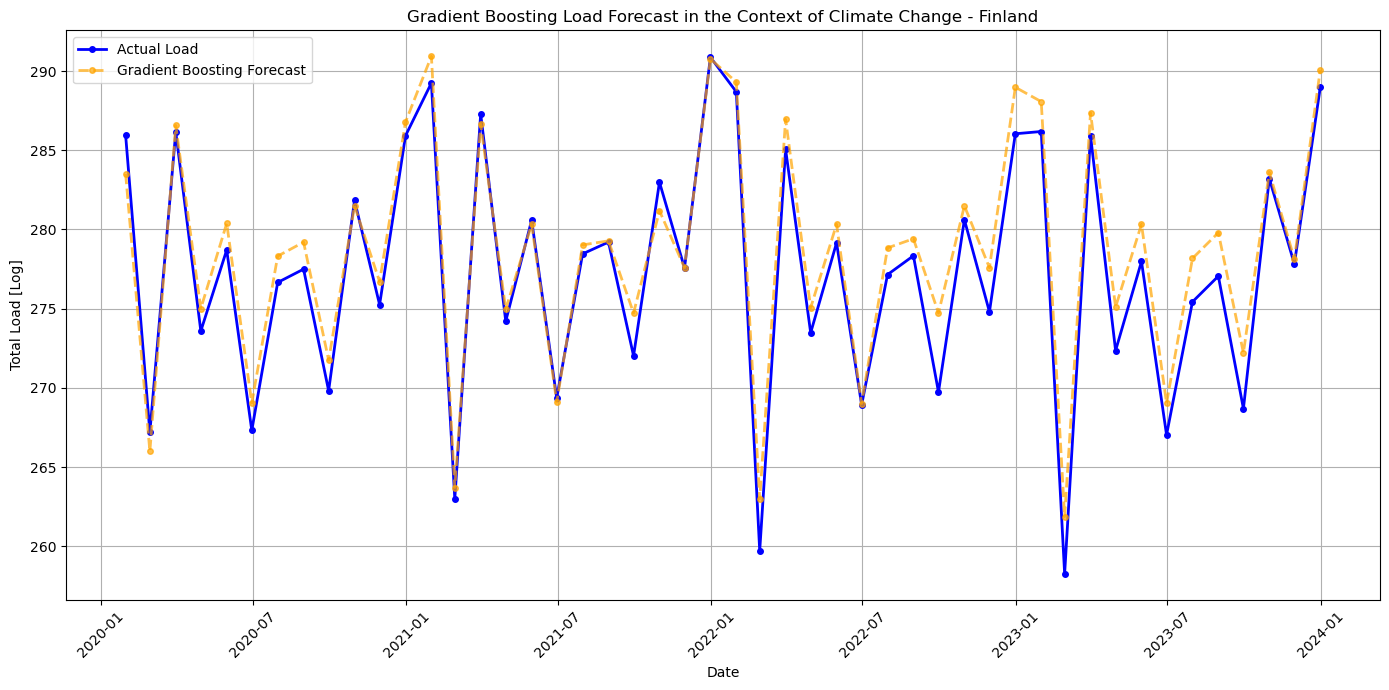

In [34]:
plt.figure(figsize=(14, 7))
plt.plot(y_test_ml_2.index, y_test_ml_2, label='Actual Load', color='blue', marker='.', linestyle='-', linewidth=2, markersize=8)
plt.plot(y_test_ml_2.index, predictions_gb_2, label='Gradient Boosting Forecast', color='orange', alpha=0.7, marker='.', linestyle='--', linewidth=2, markersize=8)

plt.title('Gradient Boosting Load Forecast in the Context of Climate Change - Finland')
plt.xlabel('Date')
plt.ylabel('Total Load [Log]')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)  
plt.tight_layout()

plt.savefig(os.path.join(my_plots, 'gb_model_2_comparison.png'), dpi=600)  # Save as PNG format at high resolution

plt.show()

## ARE THE FEATURES I CREATED RELEVANT? LETS SEE

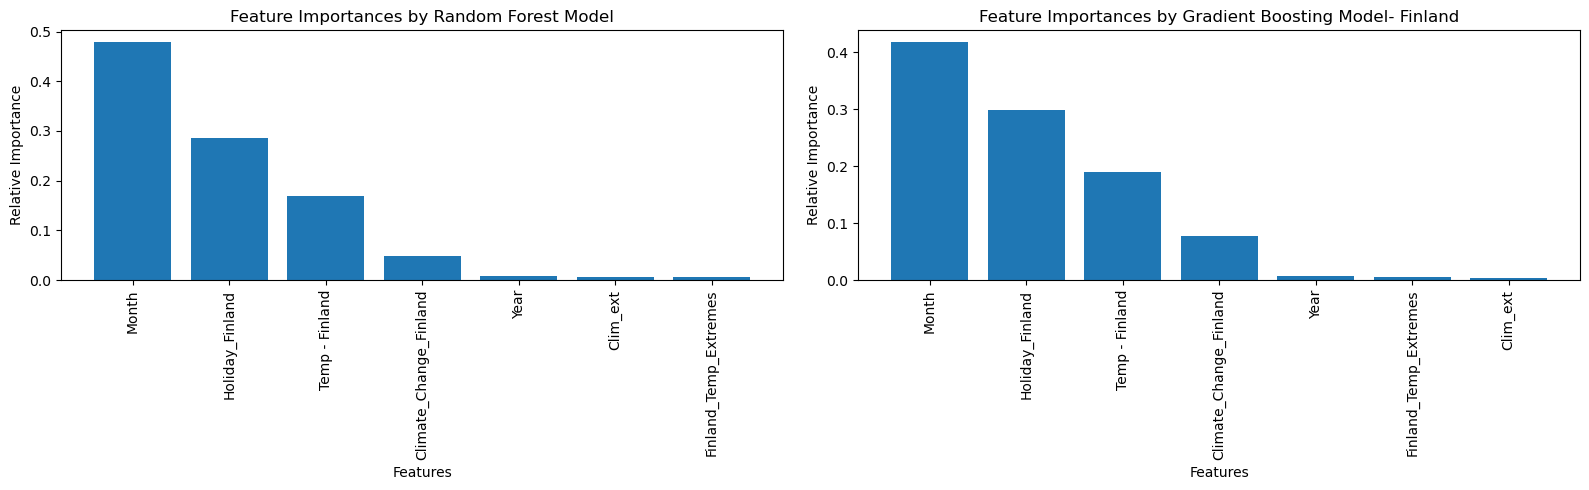

In [35]:
# the list of feature names used in my models
features_ext = ['Temp - Finland', 'Month', 'Year', 'Holiday_Finland', 'Finland_Temp_Extremes','Climate_Change_Finland','Clim_ext']

# Gettin feature importances from both models
importances_rf = rf_regressor_2.feature_importances_
importances_gb = gb_regressor_2.feature_importances_

# Sorting the feature importances in descending order and create indices to arrange them on the x-axis
indices_rf = np.argsort(importances_rf)[::-1]
indices_gb = np.argsort(importances_gb)[::-1]

# Plotting Random Forest feature importances and Gradient Boosting feature importances side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plotting Random Forest feature importances
axes[0].bar(range(len(indices_rf)), importances_rf[indices_rf], align='center')
axes[0].set_title('Feature Importances by Random Forest Model')
axes[0].set_xticks(range(len(indices_rf)))
axes[0].set_xticklabels([features_ext[i] for i in indices_rf], rotation=90)
axes[0].set_ylabel('Relative Importance')
axes[0].set_xlabel('Features')

# Plotting Gradient Boosting feature importances
axes[1].bar(range(len(indices_gb)), importances_gb[indices_gb], align='center')
axes[1].set_title('Feature Importances by Gradient Boosting Model- Finland')
axes[1].set_xticks(range(len(indices_gb)))
axes[1].set_xticklabels([features_ext[i] for i in indices_gb], rotation=90)
axes[1].set_ylabel('Relative Importance')
axes[1].set_xlabel('Features')

plt.tight_layout()
plt.savefig(os.path.join(my_plots, 'gb_feature_comparison.png'), dpi=600)  # Save as PNG format at high resolution
plt.show()


# NOW LET’S BUILD THE RESILIENT ELECTRICITY DEMAND FORECASTS IN THE FACE OF CLIMATE CHANGE USING OUR ML MODELS BY ADOPTING SENSITIVITY ANALYSIS

In [36]:
# Temperature ranges
summer_temperature_range = np.linspace(10, 35, 50)  # From mild to extreme summer temperatures
winter_temperature_range = np.linspace(-5, 5, 50)  # From extreme to mild winter temperatures

In [37]:
# Preparing my DataFrames
summer_df = pd.DataFrame({
    'Temp - Finland': summer_temperature_range,
    'Norway_Temp_Extremes': (summer_temperature_range > 30).astype(int)  # Extreme if > 30°C
})

winter_df = pd.DataFrame({
    'Temp - Finland': winter_temperature_range,
    'Norway_Temp_Extremes': (winter_temperature_range > 0).astype(int)  # Extreme if < -15°C
})

In [38]:
dump(rf_regressor, 'rf_regressor.joblib')
dump(gb_regressor, 'gb_regressor.joblib')

['gb_regressor.joblib']

In [39]:
# Adding 'Month' and 'Year' to the prediction DataFrames with placeholder values
summer_df['Month'] = 7  # Typical extreme summer month
summer_df['Year'] = 2010  # Placeholder for extreme year

winter_df['Month'] = 2  # Typical extreme winter month
winter_df['Year'] = 2011  # Placeholder for extreme year

# Making sure to use the same feature ordering as during training
prediction_features = ['Temp - Finland', 'Month', 'Year']

# Scaling the prediction DataFrames
summer_df_scaled = scaler.transform(summer_df[prediction_features])
winter_df_scaled = scaler.transform(winter_df[prediction_features])

# Performing predictions with the scaled DataFrames
rf_predictions_summer = rf_regressor.predict(summer_df_scaled)
gb_predictions_summer = gb_regressor.predict(summer_df_scaled)

rf_predictions_winter = rf_regressor.predict(winter_df_scaled)
gb_predictions_winter = gb_regressor.predict(winter_df_scaled)

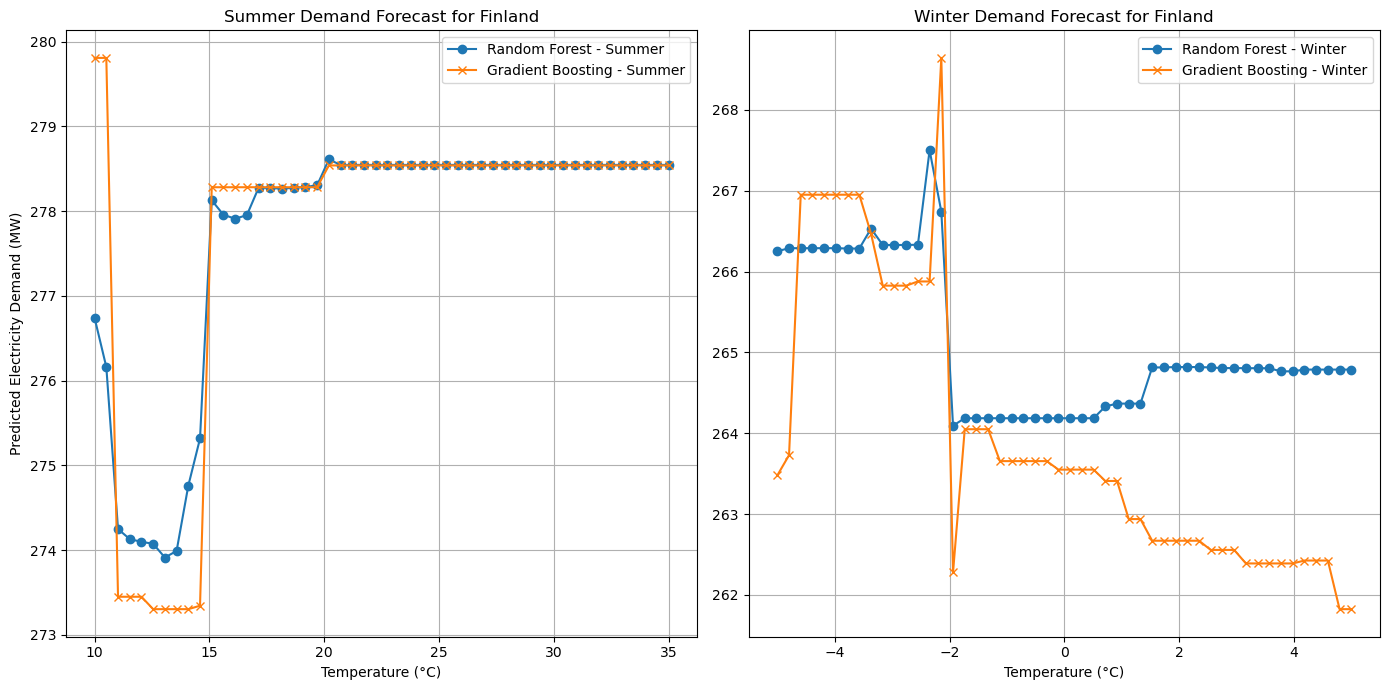

In [40]:
plt.figure(figsize=(14, 7))

# Summer Predictions
plt.subplot(1, 2, 1)
plt.plot(summer_df['Temp - Finland'], rf_predictions_summer, label='Random Forest - Summer', linestyle='-', marker='o')
plt.plot(summer_df['Temp - Finland'], gb_predictions_summer, label='Gradient Boosting - Summer', linestyle='-', marker='x')
plt.title('Summer Demand Forecast for Finland')
plt.xlabel('Temperature (°C)')
plt.ylabel('Predicted Electricity Demand (MW)')
plt.legend()
plt.grid(True)  # Adding grid to the summer predictions plot

# Winter Predictions
plt.subplot(1, 2, 2)
plt.plot(winter_df['Temp - Finland'], rf_predictions_winter, label='Random Forest - Winter', linestyle='-', marker='o')
plt.plot(winter_df['Temp - Finland'], gb_predictions_winter, label='Gradient Boosting - Winter', linestyle='-', marker='x')
plt.title('Winter Demand Forecast for Finland')
plt.xlabel('Temperature (°C)')
plt.legend()
plt.grid(True)  # Adding grid to the winter predictions plot
plt.savefig(os.path.join(my_plots, 'plot8.png'), dpi = 600)  # Save as PNG format
plt.tight_layout()
plt.show()

#### Summer Demand Forecast for Norway

Random Forest - Summer: This line represents predictions made by a Random Forest regressor for the summer season. It shows that as the temperature increases, the predicted electricity demand decreases sharply and then flattens out, suggesting a high demand during cooler days which reduces as it gets warmer, possibly due to reduced usage of heating systems.

Gradient Boosting - Summer: Similar to the Random Forest, this line shows predictions from a Gradient Boosting regressor. The trend is quite similar to the Random Forest predictions, indicating a consensus in behavior between the two models.
Both models seem to converge on a prediction that electricity demand will not change significantly with temperatures above approximately 25°C.

#### Winter Demand Forecast for Norway
Random Forest - Winter: This line illustrates the winter predictions by the Random Forest model. The predicted demand is quite high at extremely low temperatures and decreases as the temperature rises. This could be due to the increased use of heating systems during colder temperatures.
Gradient Boosting - Winter: The Gradient Boosting model's predictions follow a similar downward trend with increasing temperatures. Both models agree on the general shape of the demand curve, though there are some differences in the predicted values.
In winter, for both models, there is a noticeable steep decrease in electricity demand as temperatures rise from -20°C to around -5°C. After that, the decline in demand flattens out as temperatures approach 10°C.

#### General Observations
For both seasons, the shapes of the Random Forest and Gradient Boosting prediction lines are similar, suggesting that both models are capturing a similar relationship between temperature and electricity demand.
The sharper decline in winter predictions compared to summer may indicate that climate change have a more significant impact on electricity demand in the winter than summer.
The flattening of the prediction lines at higher summer temperatures and near-zero winter temperatures suggests a threshold beyond which changes in temperature do not significantly affect demand according to the models.

## LETS SEE HOW TO IMPROVE ON TRADITION AND MACHINE LEARNING MODELS

#### ENSEMBLE METHOD: SARIMAX with Random Forest using averages of MSE METRICS

In [41]:
# SARIMAX forecasts ( already fit the model to the training data)
sarimax_forecasts = sarimax_result2.predict(start=y_test.index[0], end=y_test.index[-1], exog=X_test_exog)

In [42]:
# Combining the forecasts using averaging
ensemble_forecasts = (sarimax_forecasts + predictions_ml_2) / 2

In [43]:
# Evaluation metrics for the ensemble forecasts
mse_ensemble = mean_squared_error(y_test_ml_2, ensemble_forecasts)
rmse_ensemble = np.sqrt(mse_ensemble)
mae_ensemble = mean_absolute_error(y_test_ml_2, ensemble_forecasts)
mape_ensemble = np.mean(np.abs((y_test_ml_2 - ensemble_forecasts) / y_test_ml_2)) * 100

print(f"Ensemble Forecast MSE: {mse_ensemble}")
print(f"Ensemble Forecast RMSE: {rmse_ensemble}")
print(f"Ensemble Forecast MAE: {mae_ensemble}")
print(f"Ensemble Forecast MAPE: {mape_ensemble}%")

Ensemble Forecast MSE: 2.8990306529701897
Ensemble Forecast RMSE: 1.7026540027175778
Ensemble Forecast MAE: 1.3909127213203714
Ensemble Forecast MAPE: 0.5065742240687647%


In [44]:
# Making predictions on the training set for SARIMAX and ML models
sarimax_train_predictions = sarimax_result.predict(start=y_train.index[0], end=y_train.index[-1], exog=X_train_ml_scaled)
ml_train_predictions = rf_regressor.predict(X_train_ml_scaled)

# Combining the forecasts using averaging for the training set
ensemble_train_forecasts = (sarimax_train_predictions + ml_train_predictions) / 2

# Evaluating the ensemble model on the training set
mse_in_sample_ensemble = mean_squared_error(y_train_ml_2, ensemble_train_forecasts)
rmse_in_sample_ensemble = np.sqrt(mse_in_sample_ensemble)
mae_in_sample_ensemble = mean_absolute_error(y_train_ml_2, ensemble_train_forecasts)
mape_in_sample_ensemble = np.mean(np.abs((y_train_ml_2 - ensemble_train_forecasts) / y_train_ml_2)) * 100

# Printing the in-sample evaluation metrics
print("In-sample Evaluation Metrics for Ensemble Forecast:")
print(f"MSE (In-sample): {mse_in_sample_ensemble}")
print(f"RMSE (In-sample): {rmse_in_sample_ensemble}")
print(f"MAE (In-sample): {mae_in_sample_ensemble}")
print(f"MAPE (In-sample): {mape_in_sample_ensemble}%")

In-sample Evaluation Metrics for Ensemble Forecast:
MSE (In-sample): 222.90860876976913
RMSE (In-sample): 14.93012420476699
MAE (In-sample): 2.887600118944233
MAPE (In-sample): 1.0107085378334737%


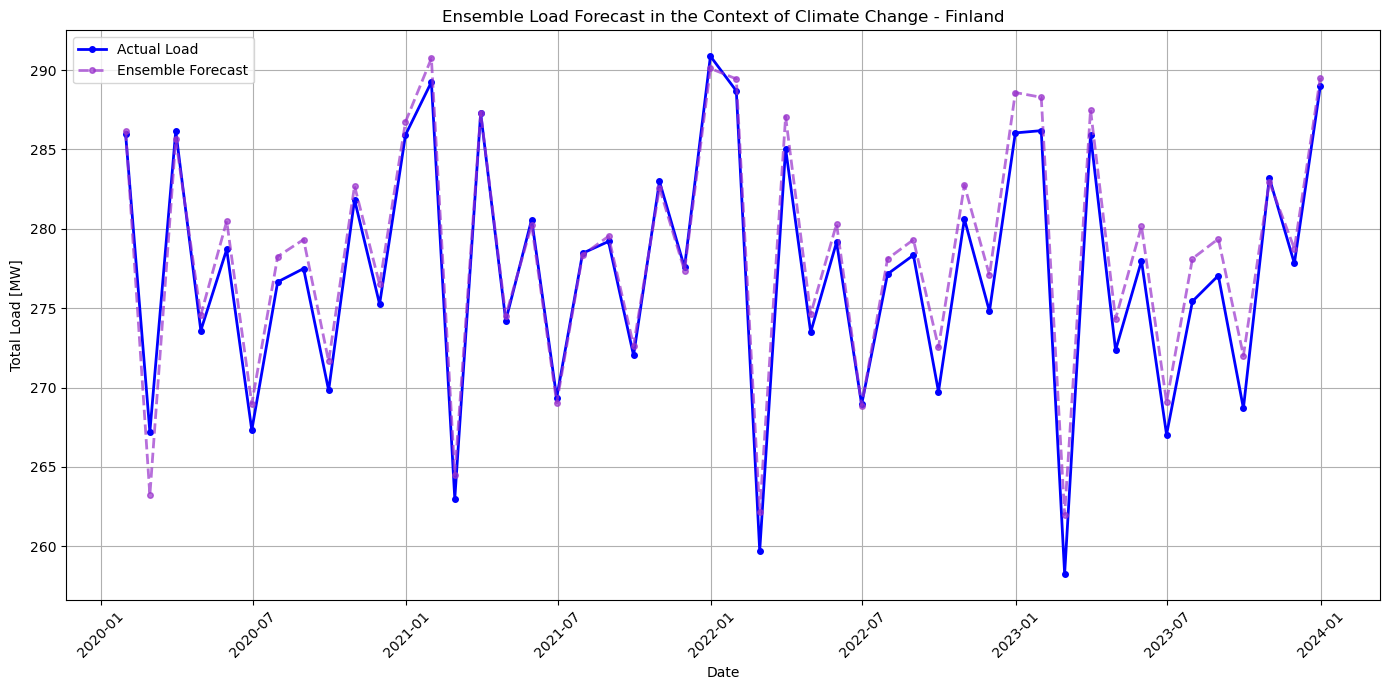

In [45]:
# Plotting the actual vs. ensemble forecasts
plt.figure(figsize=(14, 7))

# Actual load data
plt.plot(y_test_ml.index, y_test_ml, label='Actual Load', color='blue', marker='.', linestyle='-', linewidth=2, markersize=8)

# Ensemble forecasts
plt.plot(y_test_ml.index, ensemble_forecasts, label='Ensemble Forecast', color='darkorchid', alpha=0.7, marker='.', linestyle='--', linewidth=2, markersize=8)

plt.title('Ensemble Load Forecast in the Context of Climate Change - Finland')
plt.xlabel('Date')
plt.ylabel('Total Load [MW]')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(my_plots, 'plot9.png'), dpi = 600)  # Save as PNG format
plt.show()

### TIMES SERIES CROSS VALIDATION

In [46]:
# Time series cross-validation setup
tscv = TimeSeriesSplit(n_splits=10)

# Lists to store scores for Random Forest
mse_scores_rf = []
mae_scores_rf = []
rmse_scores_rf = []
mape_scores_rf = []
r2_scores_rf = []

# Lists to store scores for Gradient Boosting
mse_scores_gb = []
mae_scores_gb = []
rmse_scores_gb = []
mape_scores_gb = []
r2_scores_gb = []

for train_index, test_index in tscv.split(X_train_ml_scaled_2):
    # Split data
    X_train_fold, X_test_fold = X_train_ml_scaled_2.iloc[train_index], X_train_ml_scaled_2.iloc[test_index]
    y_train_fold, y_test_fold = y_train_ml_2.iloc[train_index], y_train_ml_2.iloc[test_index]

    # Instantiate models
    rf_regressor_fold = RandomForestRegressor(n_estimators=100, random_state=42)
    gb_regressor_fold = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

    # Fit models
    rf_regressor_fold.fit(X_train_fold, y_train_fold)
    gb_regressor_fold.fit(X_train_fold, y_train_fold)

    # Predict on the test fold
    rf_predictions_fold = rf_regressor_fold.predict(X_test_fold)
    gb_predictions_fold = gb_regressor_fold.predict(X_test_fold)

    # Calculate and collect all metrics for each fold for Random Forest
    mse_scores_rf.append(mean_squared_error(y_test_fold, rf_predictions_fold))
    mae_scores_rf.append(mean_absolute_error(y_test_fold, rf_predictions_fold))
    rmse_scores_rf.append(np.sqrt(mean_squared_error(y_test_fold, rf_predictions_fold)))
    mape_scores_rf.append(np.mean(np.abs((y_test_fold - rf_predictions_fold) / y_test_fold)) * 100)
    r2_scores_rf.append(r2_score(y_test_fold, rf_predictions_fold))

    # Calculate and collect all metrics for each fold for Gradient Boosting
    mse_scores_gb.append(mean_squared_error(y_test_fold, gb_predictions_fold))
    mae_scores_gb.append(mean_absolute_error(y_test_fold, gb_predictions_fold))
    rmse_scores_gb.append(np.sqrt(mean_squared_error(y_test_fold, gb_predictions_fold)))
    mape_scores_gb.append(np.mean(np.abs((y_test_fold - gb_predictions_fold) / y_test_fold)) * 100)
    r2_scores_gb.append(r2_score(y_test_fold, gb_predictions_fold))

# Calculate the average of all metrics across all folds for each model
avg_mse_rf = np.mean(mse_scores_rf)
avg_mae_rf = np.mean(mae_scores_rf)
avg_rmse_rf = np.mean(rmse_scores_rf)
avg_mape_rf = np.mean(mape_scores_rf)
avg_r2_rf = np.mean(r2_scores_rf)

avg_mse_gb = np.mean(mse_scores_gb)
avg_mae_gb = np.mean(mae_scores_gb)
avg_rmse_gb = np.mean(rmse_scores_gb)
avg_mape_gb = np.mean(mape_scores_gb)
avg_r2_gb = np.mean(r2_scores_gb)

# Printing out the average metrics for both models
print(f"Random Forest - MSE: {avg_mse_rf}, MAE: {avg_mae_rf}, RMSE: {avg_rmse_rf}, MAPE: {avg_mape_rf}, R2: {avg_r2_rf}")
print(f"Gradient Boosting - MSE: {avg_mse_gb}, MAE: {avg_mae_gb}, RMSE: {avg_rmse_gb}, MAPE: {avg_mape_gb}, R2: {avg_r2_gb}")

Random Forest - MSE: 10.121823571812076, MAE: 2.009062090319496, RMSE: 2.7210351858665947, MAPE: 0.7273799590755423, R2: 0.8367800719573936
Gradient Boosting - MSE: 10.22734160504012, MAE: 1.8232663787731531, RMSE: 2.693733181492374, MAPE: 0.6609401473470244, R2: 0.8262664826172321


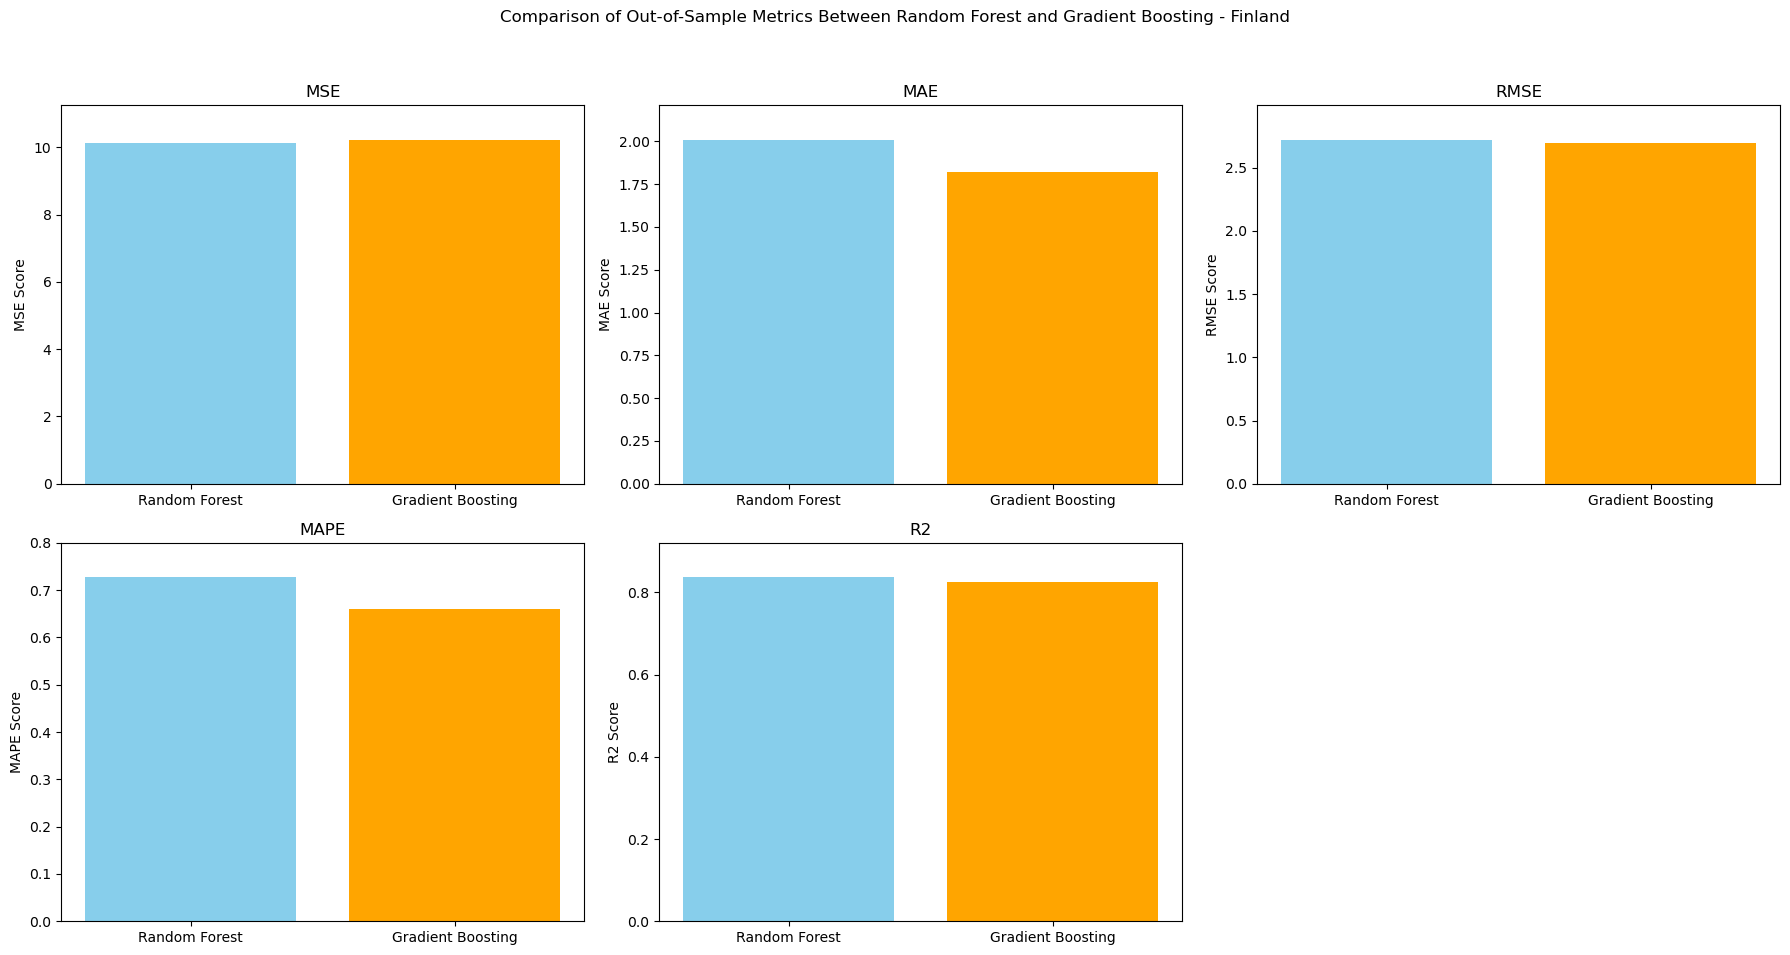

In [47]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Comparison of Out-of-Sample Metrics Between Random Forest and Gradient Boosting - Finland')

# List of metrics for plotting
metrics_values = [(avg_mse_rf, avg_mse_gb, 'MSE'), 
                  (avg_mae_rf, avg_mae_gb, 'MAE'), 
                  (avg_rmse_rf, avg_rmse_gb, 'RMSE'), 
                  (avg_mape_rf, avg_mape_gb, 'MAPE'), 
                  (avg_r2_rf, avg_r2_gb, 'R2')]

# Plotting each metric in a separate subplot
for ax, (rf_val, gb_val, metric_name) in zip(axes.flatten(), metrics_values):
    ax.bar('Random Forest', rf_val, color='skyblue')
    ax.bar('Gradient Boosting', gb_val, color='orange')
    ax.set_title(metric_name)
    ax.set_ylabel(metric_name + ' Score')
    ax.set_ylim(0, max(rf_val, gb_val) * 1.1)  # Setting y limit for better comparison

# Hiding the 6th subplot (as we have only 5 metrics)
axes[1, 2].set_visible(False)
plt.savefig(os.path.join(my_plots, 'plot11.png'), dpi = 600)  # Save as PNG format
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### SELECTING RELEVANT METRICS

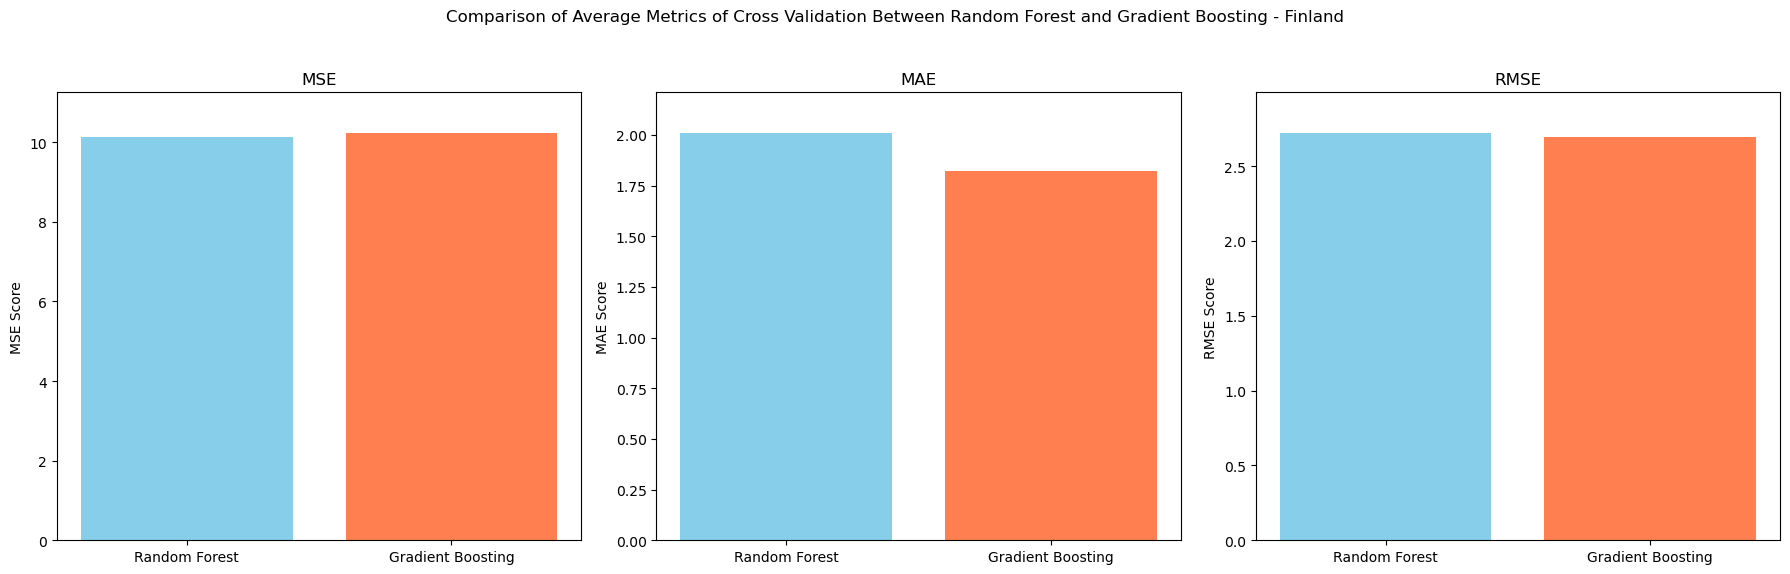

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjusted for a 1x3 grid
fig.suptitle('Comparison of Average Metrics of Cross Validation Between Random Forest and Gradient Boosting - Finland')

# my values defined here
#avg_mse_rf, avg_mse_gb = 1217717.567079088, 1044886.5317915119
#avg_mae_rf, avg_mae_gb = 892.0145622816465, 831.2262394162437
#avg_rmse_rf, avg_rmse_gb = 1102.0497905156303, 1019.703103435139

# List of metrics for plotting, updated to include only MSE, MAE, RMSE
metrics_values = [
    (avg_mse_rf, avg_mse_gb, 'MSE'), 
    (avg_mae_rf, avg_mae_gb, 'MAE'), 
    (avg_rmse_rf, avg_rmse_gb, 'RMSE')
]

# Plotting each metric in a separate subplot
for ax, (rf_val, gb_val, metric_name) in zip(axes, metrics_values):
    ax.bar('Random Forest', rf_val, color='skyblue')
    ax.bar('Gradient Boosting', gb_val, color='coral')
    ax.set_title(metric_name)
    ax.set_ylabel(metric_name + ' Score')
    ax.set_ylim(0, max(rf_val, gb_val) * 1.1)  # Setting y limit for better comparison

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(os.path.join(my_plots, 'plot11_.png'), dpi=600)  # Save as PNG format
plt.show()

THE GB outperforms the RF in MAE and RMSE. RF outperforms GB in MSE

# ENHANCING THE MODELS TO BETTER THE PERFORMANCE OF THE FORECASTS

#### We try weighted averages of MSE METRICS

### HYBRID SARIMAX & RF

In [49]:
# Calculate error metrics for each model
#mse_sarimax = mean_squared_error(y_test_ml_2, sarimax_forecasts)
#mse_ml_2 = mean_squared_error(y_test_ml_2, predictions_ml_2)

# Assign weights inversely proportional to MSE
weight_sarimax = 1 / mse_sarimax2
weight_ml_2 = 1 / mse_ml_2

# Normalize weights
total_weight = weight_sarimax + weight_ml_2
weight_sarimax /= total_weight
weight_ml_2 /= total_weight

# Combining the forecasts using weighted average
ensemble_forecasts = (sarimax_forecasts * weight_sarimax + predictions_ml_2 * weight_ml_2)

# Evaluation metrics for the ensemble forecasts
mse_ensemble = mean_squared_error(y_test_ml_2, ensemble_forecasts)
rmse_ensemble = np.sqrt(mse_ensemble)
mae_ensemble = mean_absolute_error(y_test_ml_2, ensemble_forecasts)
mape_ensemble = np.mean(np.abs((y_test_ml_2 - ensemble_forecasts) / y_test_ml_2)) * 100

print(f"Ensemble Forecast MSE: {mse_ensemble}")
print(f"Ensemble Forecast RMSE: {rmse_ensemble}")
print(f"Ensemble Forecast MAE: {mae_ensemble}")
print(f"Ensemble Forecast MAPE: {mape_ensemble}%")

Ensemble Forecast MSE: 2.895187752021215
Ensemble Forecast RMSE: 1.701525125298247
Ensemble Forecast MAE: 1.3899098411279454
Ensemble Forecast MAPE: 0.5062035527285453%


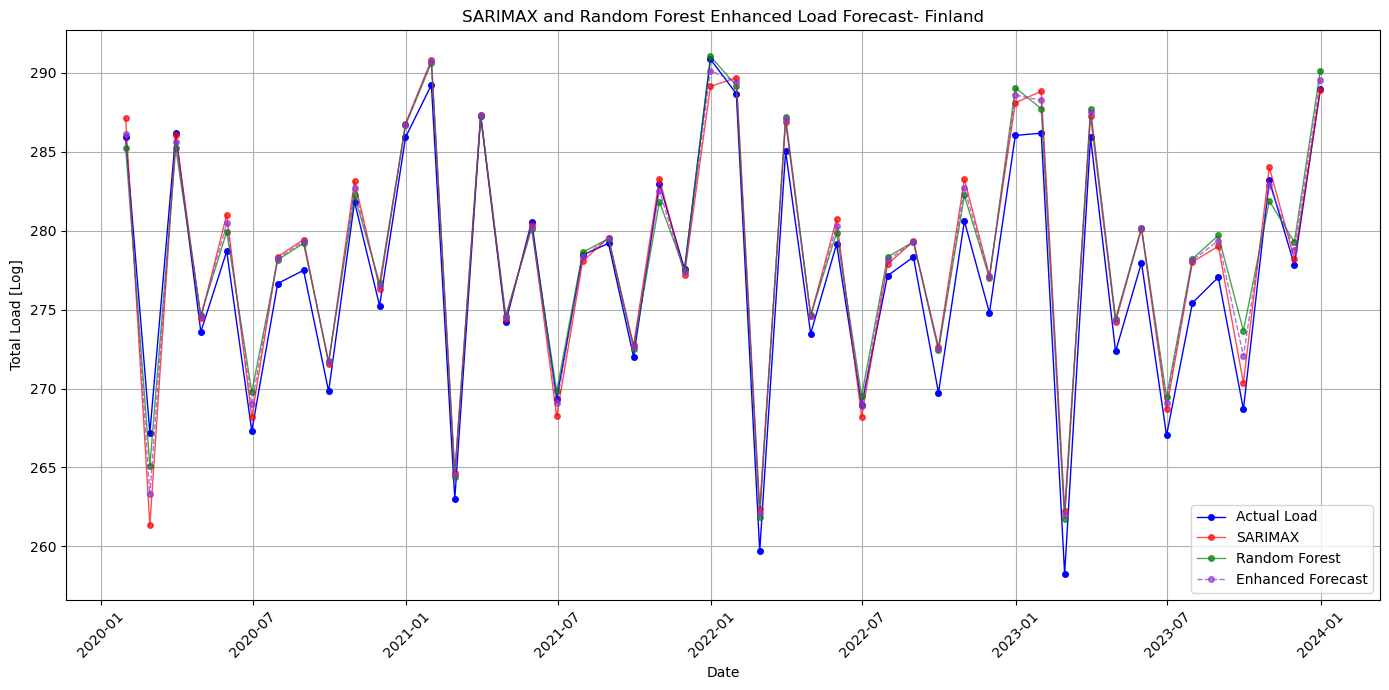

In [50]:
plt.figure(figsize=(14, 7))

# Plot actual load data
plt.plot(y_test_ml_2.index, y_test_ml_2, label='Actual Load', color='blue', marker='.', linestyle='-', linewidth=1, markersize=8)

# Plot individual model forecasts
plt.plot(y_test_ml_2.index, sarimax_forecasts, label='SARIMAX', color='red', alpha=0.7, marker='.', linestyle='-', linewidth=1, markersize=8)
plt.plot(y_test_ml_2.index, predictions_ml_2, label='Random Forest', color='green', alpha=0.7, marker='.', linestyle='-', linewidth=1, markersize=8)

# Plot ensemble forecasts
plt.plot(y_test_ml_2.index, ensemble_forecasts, label='Enhanced Forecast', color='darkorchid', alpha=0.7, marker='.', linestyle='--', linewidth=1, markersize=8)

# Customizing the plot
plt.title('SARIMAX and Random Forest Enhanced Load Forecast- Finland')
plt.xlabel('Date')
plt.ylabel('Total Load [Log]')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(my_plots, 'comp1.png'), dpi = 600)  # Save as PNG format

### HYBRID SARIMAX & GB

In [51]:
# Calculating inverse weights based on MSE
weight_sarimax = 1 / mse_sarimax2
weight_gb = 1 / mse_gb_2

# Normalize the weights so that they sum to 1
total_weight2 = weight_sarimax + weight_gb
weight_sarimax /= total_weight2
weight_gb /= total_weight2

# Combine predictions using weighted average
combined_predictions = (sarimax_forecasts * weight_sarimax + predictions_gb_2 * weight_gb)


In [52]:
# Evaluating the ensemble model's performance
mse_combined = mean_squared_error(y_test_ml_2, combined_predictions)
rmse_combined = np.sqrt(mse_combined)
mae_combined = mean_absolute_error(y_test_ml_2, combined_predictions)
mape_combined = np.mean(np.abs((y_test_ml_2 - combined_predictions) / y_test_ml_2)) * 100

# Printing my results
print(f"Combined Model MSE: {mse_combined}")
print(f"Combined Model RMSE: {rmse_combined}")
print(f"Combined Model MAE: {mae_combined}")
print(f"Combined Model MAPE: {mape_combined}%")

Combined Model MSE: 3.076711605955873
Combined Model RMSE: 1.7540557590783348
Combined Model MAE: 1.4521428564358903
Combined Model MAPE: 0.5288761838376337%


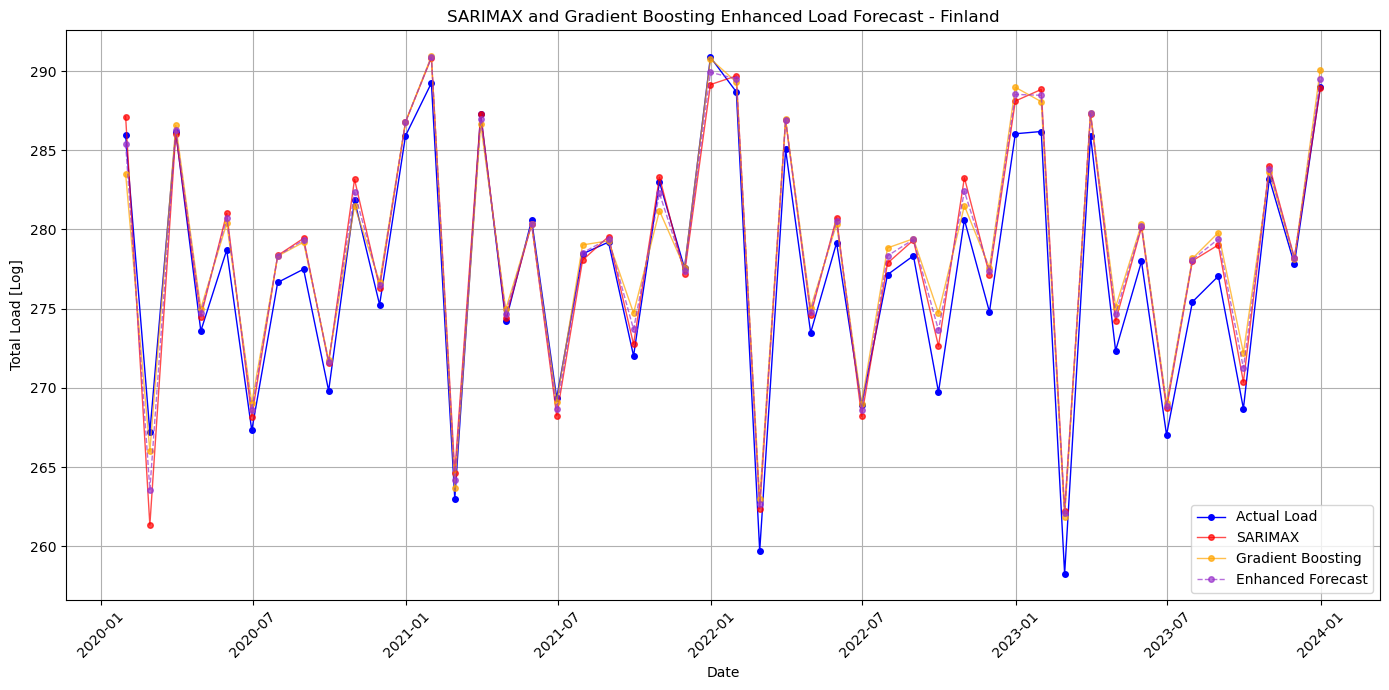

In [53]:
plt.figure(figsize=(14, 7))

# Plot actual load data
plt.plot(y_test_ml_2.index, y_test_ml_2, label='Actual Load', color='blue', marker='.', linestyle='-', linewidth=1, markersize=8)

# Plot individual model forecasts
plt.plot(y_test_ml_2.index, sarimax_forecasts, label='SARIMAX', color='red', alpha=0.7, marker='.', linestyle='-', linewidth=1, markersize=8)
plt.plot(y_test_ml_2.index, predictions_gb_2, label='Gradient Boosting', color='orange', alpha=0.7, marker='.', linestyle='-', linewidth=1, markersize=8)

# Plot ensemble forecasts
plt.plot(y_test_ml_2.index, combined_predictions, label='Enhanced Forecast', color='darkorchid', alpha=0.7, marker='.', linestyle='--', linewidth=1, markersize=8)

# Customizing the plot
plt.title('SARIMAX and Gradient Boosting Enhanced Load Forecast - Finland')
plt.xlabel('Date')
plt.ylabel('Total Load [Log]')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(my_plots, 'comp2.png'), dpi = 600)  # Save as PNG format

# Display the plot
plt.show()

#### The hybrid models improved the forecasts